# TASCA DADES, PROBABILITATS I ESTADÍSTIQUES

## NIVELL1

### *Exercici 1*

Agafa un conjunt de dades de tema esportiu que t'agradi. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matlab as mat
import random

In [2]:
from matlab import random
from random import randint

+ *Agafo la mateixa que ja conec de l'exercici anterior*

In [3]:
tenis_df = pd.read_csv('Match.csv')
tenis_df

,match_id,round,date,avg_minutes_game,avg_seconds_point,avg_minutes_set,tournament,year,match_minutes
0,m_2019_A_0,1st Round,2019-01-14,4.81,46.8,43.3,Australian Open,2019,173.0
1,m_2019_A_1,1st Round,2019-01-14,3.95,35.7,40.5,Australian Open,2019,162.0
2,m_2019_A_2,1st Round,2019-01-14,4.86,42.3,43.8,Australian Open,2019,175.0
3,m_2019_A_3,1st Round,2019-01-14,4.43,43.3,41.0,Australian Open,2019,164.0
4,m_2019_A_4,1st Round,2019-01-14,4.37,39.7,43.7,Australian Open,2019,131.0
...,...,...,...,...,...,...,...,...,...
10155,m_2000_W_122,Quarterfinals,2000-06-26,3.95,37.3,41.5,Wimbledon,2000,166.0
10156,m_2000_W_123,Quarterfinals,2000-06-26,4.26,39.0,48.3,Wimbledon,2000,145.0
10157,m_2000_W_124,Semifinals,2000-06-26,3.74,37.2,39.6,Wimbledon,2000,198.0
10158,m_2000_W_125,Semifinals,2000-06-26,3.30,34.7,33.0,Wimbledon,2000,99.0


In [4]:
tenis_df['avg_minutes_set'].describe()

count    10078.000000
mean        39.223477
std         10.129553
min          0.000000
25%         34.400000
50%         39.300000
75%         44.700000
max        133.000000
Name: avg_minutes_set, dtype: float64

In [5]:
tenis_df['avg_minutes_set'].mean()

39.223476880332335

In [6]:
tenis_df['avg_minutes_set'].median()

39.3

In [7]:
tenis_df['avg_minutes_set'].std()

10.129553007766674

In [8]:
tenis_df['avg_minutes_set'].mode()

0    0.0
dtype: float64

+ *Resulta extrany que el valor més frequent de la columna 'avg_minutes_set' sigui "O"*

   *I ho comprovo amb un "value_counts()"* 

In [9]:
tenis_df['avg_minutes_set'].value_counts()

0.0      255
38.0     165
41.0     163
37.0     160
40.0     146
        ... 
78.6       1
65.8       1
73.3       1
133.0      1
66.2       1
Name: avg_minutes_set, Length: 364, dtype: int64

+ *Faig una ullada a les files que tenen el valor 0 a la columna de 'avg_minutes_set' i vec que totes les columnes 
   amb valor numèric també són 0*
   
   *Aquest partits són segur aquells on un dels jugadors no s'hi ha presentat (per lesió en l'anterior partit)*

In [10]:
tenis_set0_df = tenis_df[tenis_df['avg_minutes_set'] == 0]
tenis_set0_df

,match_id,round,date,avg_minutes_game,avg_seconds_point,avg_minutes_set,tournament,year,match_minutes
5167,m_2019_U_87,2nd Round,2019-08-29,0.0,0.0,0.0,US Open,2019,0.0
5588,m_2015_U_0,1st Round,2015-08-31,0.0,0.0,0.0,US Open,2015,0.0
5589,m_2015_U_1,1st Round,2015-08-31,0.0,0.0,0.0,US Open,2015,0.0
5590,m_2015_U_2,1st Round,2015-08-31,0.0,0.0,0.0,US Open,2015,0.0
5591,m_2015_U_3,1st Round,2015-08-31,0.0,0.0,0.0,US Open,2015,0.0
...,...,...,...,...,...,...,...,...,...
8250,m_2015_W_122,Quarterfinals,2015-08-07,0.0,0.0,0.0,Wimbledon,2015,0.0
8251,m_2015_W_123,Quarterfinals,2015-08-07,0.0,0.0,0.0,Wimbledon,2015,0.0
8252,m_2015_W_124,Semifinals,2015-10-07,0.0,0.0,0.0,Wimbledon,2015,0.0
8253,m_2015_W_125,Semifinals,2015-10-07,0.0,0.0,0.0,Wimbledon,2015,0.0


  *Per tant faré un sub data frame on elimino les files que contenen el valor 0 per poder fer millor estadística*

In [11]:
index_values = tenis_df[(tenis_df['avg_minutes_set'] == 0)].index 
tenis2_df = tenis_df.drop(index_values)
tenis2_df

,match_id,round,date,avg_minutes_game,avg_seconds_point,avg_minutes_set,tournament,year,match_minutes
0,m_2019_A_0,1st Round,2019-01-14,4.81,46.8,43.3,Australian Open,2019,173.0
1,m_2019_A_1,1st Round,2019-01-14,3.95,35.7,40.5,Australian Open,2019,162.0
2,m_2019_A_2,1st Round,2019-01-14,4.86,42.3,43.8,Australian Open,2019,175.0
3,m_2019_A_3,1st Round,2019-01-14,4.43,43.3,41.0,Australian Open,2019,164.0
4,m_2019_A_4,1st Round,2019-01-14,4.37,39.7,43.7,Australian Open,2019,131.0
...,...,...,...,...,...,...,...,...,...
10155,m_2000_W_122,Quarterfinals,2000-06-26,3.95,37.3,41.5,Wimbledon,2000,166.0
10156,m_2000_W_123,Quarterfinals,2000-06-26,4.26,39.0,48.3,Wimbledon,2000,145.0
10157,m_2000_W_124,Semifinals,2000-06-26,3.74,37.2,39.6,Wimbledon,2000,198.0
10158,m_2000_W_125,Semifinals,2000-06-26,3.30,34.7,33.0,Wimbledon,2000,99.0


+ *I repeteixo el que he fet abans*

In [12]:
tenis2_df['avg_minutes_set'].describe()

count    9823.000000
mean       40.241698
std         8.018269
min         8.600000
25%        35.000000
50%        39.500000
75%        44.800000
max       133.000000
Name: avg_minutes_set, dtype: float64

In [13]:
tenis2_df['avg_minutes_set'].mean()

40.241698055582745

In [14]:
tenis2_df['avg_minutes_set'].median()

39.5

In [15]:
tenis2_df['avg_minutes_set'].std()

8.018269205912468

In [16]:
tenis2_df['avg_minutes_set'].mode()

0    38.0
dtype: float64

+ *I ho comprovo amb "".value_counts()"*

In [17]:
tenis2_df['avg_minutes_set'].value_counts()

38.0    165
41.0    163
37.0    160
40.0    146
39.3    145
       ... 
20.7      1
64.3      1
25.4      1
21.0      1
26.2      1
Name: avg_minutes_set, Length: 363, dtype: int64

### *Exercici 2*

Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

+ *Selecciono 'avg_minutes_game' i "avg_minutes_set"*

In [18]:
correlation = tenis2_df['avg_minutes_game'].corr(tenis2_df['avg_minutes_set'])

In [19]:
print('L\'índex de correl.lació entre \'avg_minutes_game\' i \'avg_minutes_set\' és: {}'.format(correlation))

L'índex de correl.lació entre 'avg_minutes_game' i 'avg_minutes_set' és: 0.7727697334335708


+ *Sembla raonable que existeix una correlació positiva i prou propera a 1*

  *__És a dir, que quan més disputats ( = més temps duren) els jocs, més disputats i més temps duren els sets__*

## NIVELL 2

### *Exercici 3*

Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.


In [20]:
tenis2_df['year'].describe()

count    9905.000000
mean     2009.358809
std         5.771224
min      2000.000000
25%      2004.000000
50%      2009.000000
75%      2014.000000
max      2019.000000
Name: year, dtype: float64

+ *Tinc una columna ("year") que sent numèrica tipus "float64" no m'aporta res a l'estudi de la correlació i me'n desfaig*

In [21]:
tenis2_df.drop(columns = ['year'], inplace = True)
tenis2_df

,match_id,round,date,avg_minutes_game,avg_seconds_point,avg_minutes_set,tournament,match_minutes
0,m_2019_A_0,1st Round,2019-01-14,4.81,46.8,43.3,Australian Open,173.0
1,m_2019_A_1,1st Round,2019-01-14,3.95,35.7,40.5,Australian Open,162.0
2,m_2019_A_2,1st Round,2019-01-14,4.86,42.3,43.8,Australian Open,175.0
3,m_2019_A_3,1st Round,2019-01-14,4.43,43.3,41.0,Australian Open,164.0
4,m_2019_A_4,1st Round,2019-01-14,4.37,39.7,43.7,Australian Open,131.0
...,...,...,...,...,...,...,...,...
10155,m_2000_W_122,Quarterfinals,2000-06-26,3.95,37.3,41.5,Wimbledon,166.0
10156,m_2000_W_123,Quarterfinals,2000-06-26,4.26,39.0,48.3,Wimbledon,145.0
10157,m_2000_W_124,Semifinals,2000-06-26,3.74,37.2,39.6,Wimbledon,198.0
10158,m_2000_W_125,Semifinals,2000-06-26,3.30,34.7,33.0,Wimbledon,99.0


In [22]:
corr_df = tenis2_df.corr(method = 'pearson')
corr_df

,avg_minutes_game,avg_seconds_point,avg_minutes_set,match_minutes
avg_minutes_game,1.000000,0.661246,0.772770,0.485545
avg_seconds_point,0.661246,1.000000,0.462204,0.300778
avg_minutes_set,0.772770,0.462204,1.000000,0.619264
match_minutes,0.485545,0.300778,0.619264,1.000000


+ *I utilitzo seaborn per fer la visualització de la matriu de correlació obtinguda*

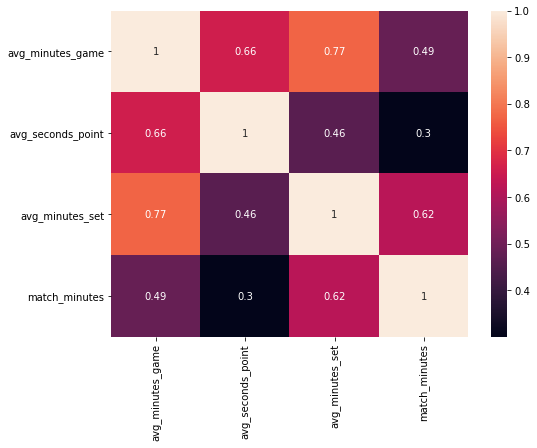

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

## NIVELL 3

### *Exercici 4*

Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

+ *Instal.lo statistics per poder importar "geometric_mean"*

In [24]:
from statistics import geometric_mean

In [25]:
geom_mean = geometric_mean(tenis2_df['match_minutes'])
print('La geometric mean de la variable match_minutes és {}'.format(geom_mean))    

La geometric mean de la variable match_minutes és nan


+ *Vec que dona Nan.Potser és perquè hi ha null values a la columna 'match_minutes*



In [26]:
tenis2_df['match_minutes'].isnull().sum()

43

+ *Efectivament hi ha 43 null values a la columna 'match minutes'*

  *Per tant em desfaré de totes les observacions del data frame que continguin null values*

In [27]:
tenis2_df = tenis2_df.dropna()
tenis2_df

,match_id,round,date,avg_minutes_game,avg_seconds_point,avg_minutes_set,tournament,match_minutes
0,m_2019_A_0,1st Round,2019-01-14,4.81,46.8,43.3,Australian Open,173.0
1,m_2019_A_1,1st Round,2019-01-14,3.95,35.7,40.5,Australian Open,162.0
2,m_2019_A_2,1st Round,2019-01-14,4.86,42.3,43.8,Australian Open,175.0
3,m_2019_A_3,1st Round,2019-01-14,4.43,43.3,41.0,Australian Open,164.0
4,m_2019_A_4,1st Round,2019-01-14,4.37,39.7,43.7,Australian Open,131.0
...,...,...,...,...,...,...,...,...
10155,m_2000_W_122,Quarterfinals,2000-06-26,3.95,37.3,41.5,Wimbledon,166.0
10156,m_2000_W_123,Quarterfinals,2000-06-26,4.26,39.0,48.3,Wimbledon,145.0
10157,m_2000_W_124,Semifinals,2000-06-26,3.74,37.2,39.6,Wimbledon,198.0
10158,m_2000_W_125,Semifinals,2000-06-26,3.30,34.7,33.0,Wimbledon,99.0


+ *I ho comprovo*

In [28]:
tenis2_df['match_minutes'].isnull().sum()

0

In [29]:
geom_mean = geometric_mean(tenis2_df['match_minutes'])
print('La geometric mean de la variable match_minutes és {}'.format(geom_mean)) 

La geometric mean de la variable match_minutes és 138.97519942142176


+ *Alternativa amb mòdul scipy*

In [32]:
from scipy import stats

In [33]:
x = tenis2_df['match_minutes']
x

0        173.0
1        162.0
2        175.0
3        164.0
4        131.0
         ...  
10155    166.0
10156    145.0
10157    198.0
10158     99.0
10159    178.0
Name: match_minutes, Length: 9823, dtype: float64

In [34]:
print(stats.gmean(x))

138.97519942142176


+ *Ara trobem la mitjana harmònica*

+ *Des de statistics importo "harmonic_mean"*

In [35]:
from statistics import harmonic_mean

In [37]:
harmo_mean = harmonic_mean(tenis2_df['match_minutes'])
print('La harmonic mean de la variable match_minutes és {}'.format(harmo_mean)) 

La harmonic mean de la variable match_minutes és 131.17486659410784
